# Verify AlphaFold accuracy for 97 targets
Subset: target_subset_how_eq_random_num_100_seed_0

Set the target numbers of `is_similar_AF2` and not `is_similar_AF2` equal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (5, 3)

In [2]:
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'accuracy'
fig_dir.mkdir(parents=True, exist_ok=True)
target_list = data_dir / 'interim' / f'{subset_name}.csv'
assert target_list.exists()

In [3]:
label_path = score_dir / 'label.csv'
label_df = pd.read_csv(label_path, index_col=0)
label_df

,Model,GDT_TS,GDT_HA,TMscore,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,Seed,Recycle,Ensemble,Target,Num_diff,Num_missing,Length
0,model_1_ptm_seed_0_rec_10_ens_1,0.962,0.869,0.687,0.872,0.868,0.961,0.895,0.059,model_1_ptm,0,10,1,6EW1_A,0,3,291
1,model_1_ptm_seed_0_rec_10_ens_8,0.961,0.863,0.679,0.873,0.869,0.962,0.896,0.017,model_1_ptm,0,10,8,6EW1_A,0,3,291
2,model_1_ptm_seed_0_rec_1_ens_1,0.968,0.889,0.708,0.874,0.870,0.957,0.895,29.472,model_1_ptm,0,1,1,6EW1_A,0,3,291
3,model_1_ptm_seed_0_rec_1_ens_8,0.967,0.882,0.702,0.874,0.871,0.957,0.895,29.592,model_1_ptm,0,1,8,6EW1_A,0,3,291
4,model_1_ptm_seed_0_rec_2_ens_1,0.965,0.878,0.697,0.872,0.868,0.959,0.895,0.492,model_1_ptm,0,2,1,6EW1_A,0,3,291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35795,model_5_seed_1_rec_5_ens_1,0.989,0.962,0.848,0.923,0.919,0.928,NaN,0.869,model_5,1,5,1,7MJW_A,0,16,457
35796,model_5_seed_1_rec_6_ens_1,0.989,0.960,0.844,0.924,0.920,0.930,NaN,0.396,model_5,1,6,1,7MJW_A,0,16,457
35797,model_5_seed_1_rec_7_ens_1,0.989,0.960,0.842,0.923,0.919,0.930,NaN,0.141,model_5,1,7,1,7MJW_A,0,16,457
35798,model_5_seed_1_rec_8_ens_1,0.989,0.961,0.844,0.923,0.920,0.930,NaN,0.152,model_5,1,8,1,7MJW_A,0,16,457


In [4]:
target_df = pd.read_csv(target_list, index_col=0)
target_df

,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
5370,6EW1_A,2.472,2021-04-07T00:00:00Z,>6ew1_A mol:protein length:291 Filamin-A,SMCNPSACRAVGRGLQPKGVRVKETADFKVYTKGAGSGELKVTVKG...,291,2,1,True
3747,7CCM_A,2.282,2020-08-05T00:00:00Z,>7ccm_A mol:protein length:183 Bcl-2-like pro...,MGSSHHHHHHSSGLVPRGSHMKSSQTFEEQTECIVNTLLMDFLSPT...,183,6,3,True
2171,6JFK_A,2.030,2020-04-22T00:00:00Z,">6jfk_A mol:protein length:438 Mitofusin-2,cD...",GPHMGGSAEVNASPLKHFVTAKKKINGIFEQLGAYIQESATFLEDT...,438,19,3,True
555,5Z2R_A,2.430,2018-08-01T00:00:00Z,>5z2r_A mol:protein length:556 2-succinyl-5-e...,MSVSAFNRRWAAVILEALTRHGVRHICIAPGSRSTPLTLAAAENSA...,556,106,24,True
2417,6K5G_A,1.600,2019-04-10T00:00:00Z,>6k5g_A mol:protein length:309 Uridine phosph...,MGMAYQNTNAMPTHSDGTVLHLGLRAGQVANRIVSVGSLGRAKVLA...,309,16,12,True
...,...,...,...,...,...,...,...,...,...
5286,5QU5_A,1.130,2019-08-28T00:00:00Z,>5qu5_A mol:protein length:99 Cytoplasmic pro...,MGHHHHHHHHHHSGGLNDIFEAQKIEWHEGSENLYFQSMAEEVVVV...,99,2,2,False
4048,6P7L_A,1.820,2021-04-07T00:00:00Z,>6p7l_A mol:protein length:172 Aln2,MTTDETTTTDATTITDATTIADATTRNAPKLPSPELYVEVTQFYAR...,172,6,6,False
4172,5Z4Y_A,2.000,2018-06-20T00:00:00Z,>5z4y_A mol:protein length:89 Cys regulon tra...,SMKLQQLRYIWEVAHHDLNVSATAQSLYTSQPGISKQIRLLEDELG...,89,5,5,False
6002,6HCZ_A,2.410,2020-10-14T00:00:00Z,>6hcz_A mol:protein length:199 Sjoegren syndr...,MALNGAEVDDFSWEPPTEAETKVLQARRERQDRISRLMGDYLLRGY...,199,2,2,False


In [5]:
target_df['is_similar_AF2'].value_counts()

False    50
True     50
Name: is_similar_AF2, dtype: int64

In [6]:
df = pd.merge(label_df, target_df, left_on='Target', right_on='id', how='left')
df

,Model,GDT_TS,GDT_HA,TMscore,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,...,Length,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
0,model_1_ptm_seed_0_rec_10_ens_1,0.962,0.869,0.687,0.872,0.868,0.961,0.895,0.059,model_1_ptm,...,291,6EW1_A,2.472,2021-04-07T00:00:00Z,>6ew1_A mol:protein length:291 Filamin-A,SMCNPSACRAVGRGLQPKGVRVKETADFKVYTKGAGSGELKVTVKG...,291,2,1,True
1,model_1_ptm_seed_0_rec_10_ens_8,0.961,0.863,0.679,0.873,0.869,0.962,0.896,0.017,model_1_ptm,...,291,6EW1_A,2.472,2021-04-07T00:00:00Z,>6ew1_A mol:protein length:291 Filamin-A,SMCNPSACRAVGRGLQPKGVRVKETADFKVYTKGAGSGELKVTVKG...,291,2,1,True
2,model_1_ptm_seed_0_rec_1_ens_1,0.968,0.889,0.708,0.874,0.870,0.957,0.895,29.472,model_1_ptm,...,291,6EW1_A,2.472,2021-04-07T00:00:00Z,>6ew1_A mol:protein length:291 Filamin-A,SMCNPSACRAVGRGLQPKGVRVKETADFKVYTKGAGSGELKVTVKG...,291,2,1,True
3,model_1_ptm_seed_0_rec_1_ens_8,0.967,0.882,0.702,0.874,0.871,0.957,0.895,29.592,model_1_ptm,...,291,6EW1_A,2.472,2021-04-07T00:00:00Z,>6ew1_A mol:protein length:291 Filamin-A,SMCNPSACRAVGRGLQPKGVRVKETADFKVYTKGAGSGELKVTVKG...,291,2,1,True
4,model_1_ptm_seed_0_rec_2_ens_1,0.965,0.878,0.697,0.872,0.868,0.959,0.895,0.492,model_1_ptm,...,291,6EW1_A,2.472,2021-04-07T00:00:00Z,>6ew1_A mol:protein length:291 Filamin-A,SMCNPSACRAVGRGLQPKGVRVKETADFKVYTKGAGSGELKVTVKG...,291,2,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35795,model_5_seed_1_rec_5_ens_1,0.989,0.962,0.848,0.923,0.919,0.928,NaN,0.869,model_5,...,457,7MJW_A,1.420,2021-09-15T00:00:00Z,>7mjw_A mol:protein length:457 tRNA-2-methylt...,MEKVTGADFKSATADDNKKLFIETYGCQMNVADSEVIASVMQMAGY...,457,7,7,False
35796,model_5_seed_1_rec_6_ens_1,0.989,0.960,0.844,0.924,0.920,0.930,NaN,0.396,model_5,...,457,7MJW_A,1.420,2021-09-15T00:00:00Z,>7mjw_A mol:protein length:457 tRNA-2-methylt...,MEKVTGADFKSATADDNKKLFIETYGCQMNVADSEVIASVMQMAGY...,457,7,7,False
35797,model_5_seed_1_rec_7_ens_1,0.989,0.960,0.842,0.923,0.919,0.930,NaN,0.141,model_5,...,457,7MJW_A,1.420,2021-09-15T00:00:00Z,>7mjw_A mol:protein length:457 tRNA-2-methylt...,MEKVTGADFKSATADDNKKLFIETYGCQMNVADSEVIASVMQMAGY...,457,7,7,False
35798,model_5_seed_1_rec_8_ens_1,0.989,0.961,0.844,0.923,0.920,0.930,NaN,0.152,model_5,...,457,7MJW_A,1.420,2021-09-15T00:00:00Z,>7mjw_A mol:protein length:457 tRNA-2-methylt...,MEKVTGADFKSATADDNKKLFIETYGCQMNVADSEVIASVMQMAGY...,457,7,7,False


In [7]:
# Check target number
targets = df['Target'].unique().tolist()
print(len(targets))

97


In [8]:
# Check target number that does not have LDDT score
df.groupby('Target').head(1)['Global_LDDT'].isnull().sum()

9

<AxesSubplot:xlabel='TMscore', ylabel='missing_rate'>

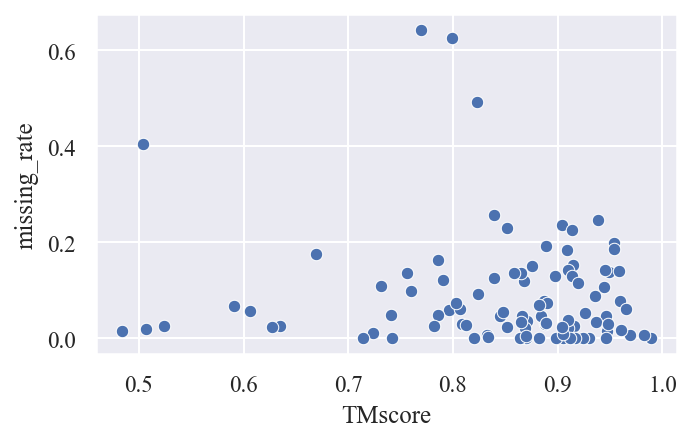

In [9]:
max_tmscore_df = df.groupby('Target').max('TMscore')
max_tmscore_df['missing_rate'] = max_tmscore_df['Num_missing'] / max_tmscore_df['Length']
sns.scatterplot(data=max_tmscore_df, x='TMscore', y='missing_rate')

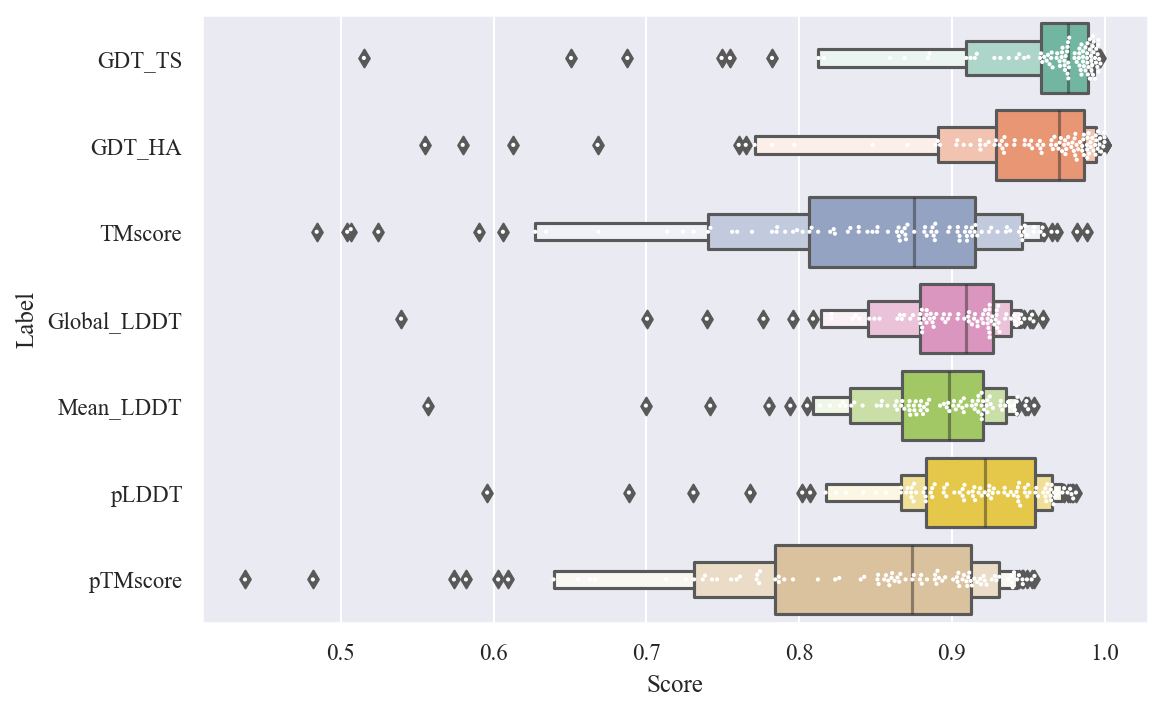

In [10]:
# max value for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Global_LDDT', 'Mean_LDDT', 'pLDDT', 'pTMscore']
for label in labels:
    data=df.groupby('Target').max(label)
    data['Score'] = data[label]
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=2)
plt.tight_layout()
plt.savefig(fig_dir / 'max_value_each_labels.png')

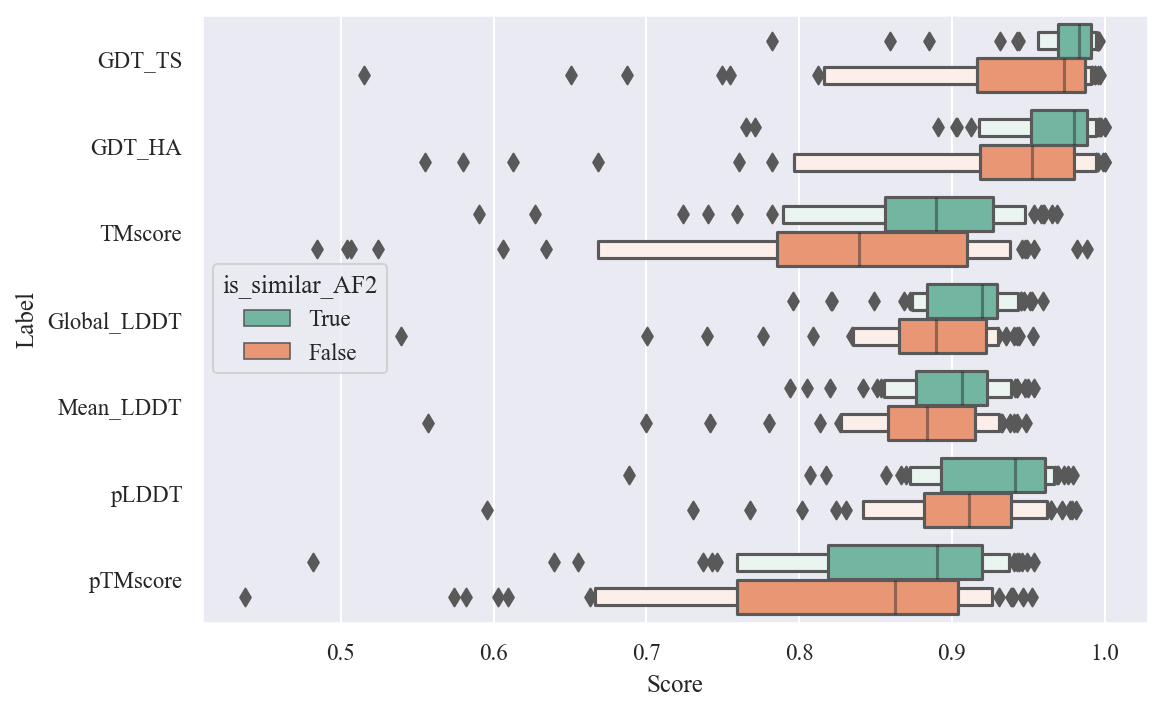

In [11]:
# max value for each label
# Targets whose similar sequence is included in AF2 training dataset or not
label_max_datas = []
for label in labels:
    data=df.groupby('Target').max(label)
    data['Score'] = data[label]
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2', hue='is_similar_AF2', hue_order=[True, False])
plt.tight_layout()
plt.savefig(fig_dir / 'max_value_each_labels_similar_training.png')

,GDT_TS,GDT_HA,TMscore,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,Seed,Recycle,Ensemble,Num_diff,Num_missing,Length,resolution,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2,missing_rate
Target,,,,,,,,,,,,,,,,,,,,
5LOS_A,0.974,0.989,0.938,0.930,0.932,0.902,0.738,37.259,1,10,8,0,29,118,2.031,118,1,1,False,0.246
5QU5_A,0.515,0.555,0.504,0.777,0.780,0.768,0.574,47.030,1,10,8,0,40,99,1.130,99,2,2,False,0.404
5ZC1_A,0.928,0.933,0.839,0.883,0.867,0.850,0.666,39.246,1,10,8,0,35,136,2.465,136,6,6,False,0.257
5ZX9_A,0.937,0.929,0.823,0.837,0.829,0.731,0.582,60.025,1,10,8,0,160,325,1.580,325,2,2,False,0.492
6HCZ_A,0.816,0.892,0.769,0.864,0.864,0.802,0.437,43.867,1,10,8,6,128,199,2.410,199,2,2,False,0.643
6LYX_A,0.972,0.972,0.904,0.888,0.884,0.882,0.773,43.690,1,10,8,0,36,153,1.710,153,4,4,False,0.235
6Y2C_A,0.947,0.965,0.913,0.886,0.872,0.842,0.726,21.611,1,10,8,0,21,93,2.099,93,2,2,False,0.226
7CCM_A,0.962,0.971,0.851,NaN,NaN,0.817,0.737,34.374,1,10,8,0,42,183,2.282,183,6,3,True,0.230
7OF7_8,0.885,0.912,0.799,0.796,0.794,0.807,0.482,59.623,1,10,8,0,129,206,1.704,206,57,3,True,0.626


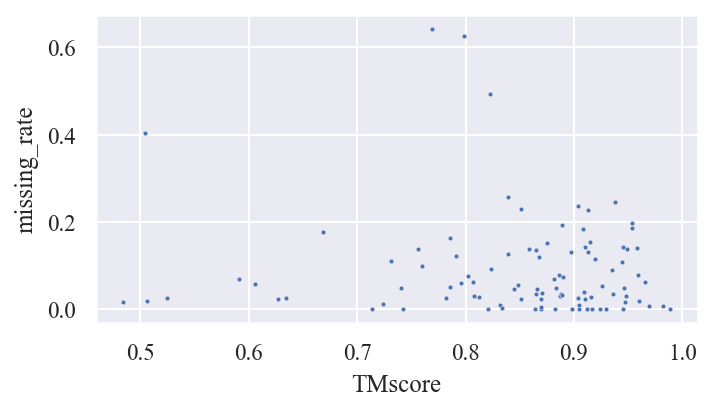

In [12]:
# Relationship between TMscore and ratio of missing residues
max_tmscore_df = df.groupby('Target').max('TMscore')
max_tmscore_df['missing_rate'] = max_tmscore_df['Num_missing'] / max_tmscore_df['Length']
display(max_tmscore_df.query('missing_rate > 0.2'))
sns.scatterplot(data=max_tmscore_df, x='TMscore', y='missing_rate', s=5)
plt.tight_layout()

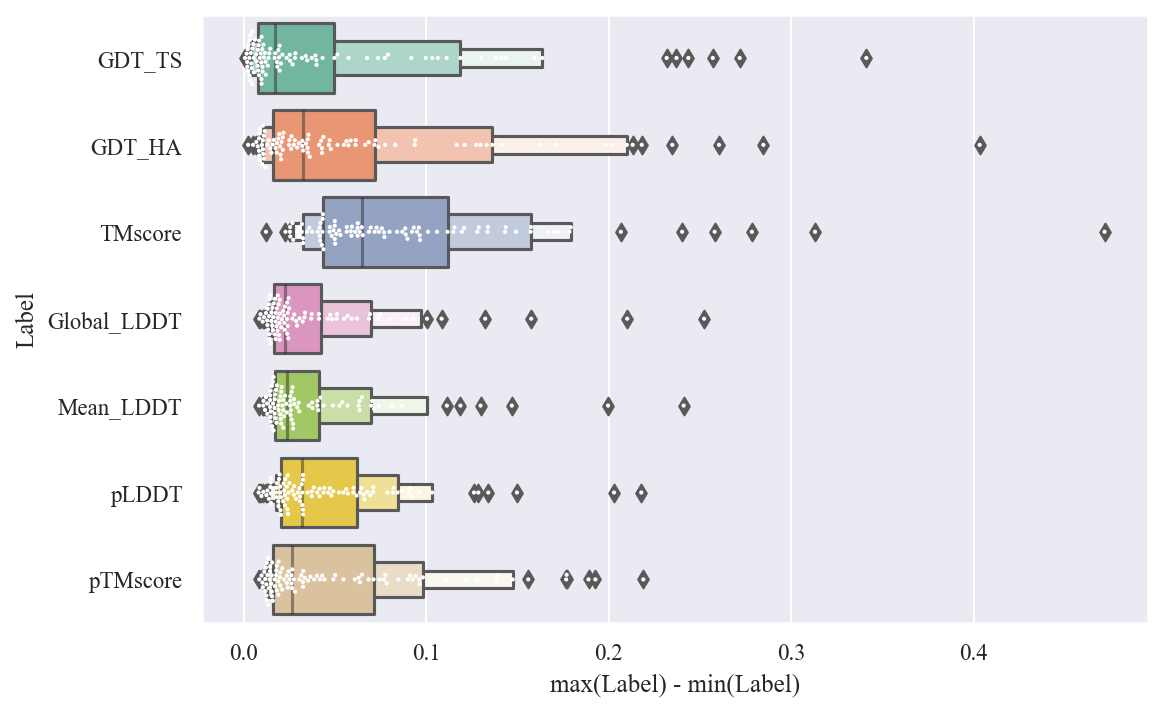

In [13]:
# max value - min value for each label
label_max_datas = []
for label in labels:
    value=df.groupby('Target').max(label)[label] - df.groupby('Target').min(label)[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=2)
plt.xlabel(f'max(Label) - min(Label)')
plt.tight_layout()
plt.savefig(fig_dir / 'max_minus_min_each_labels.png')

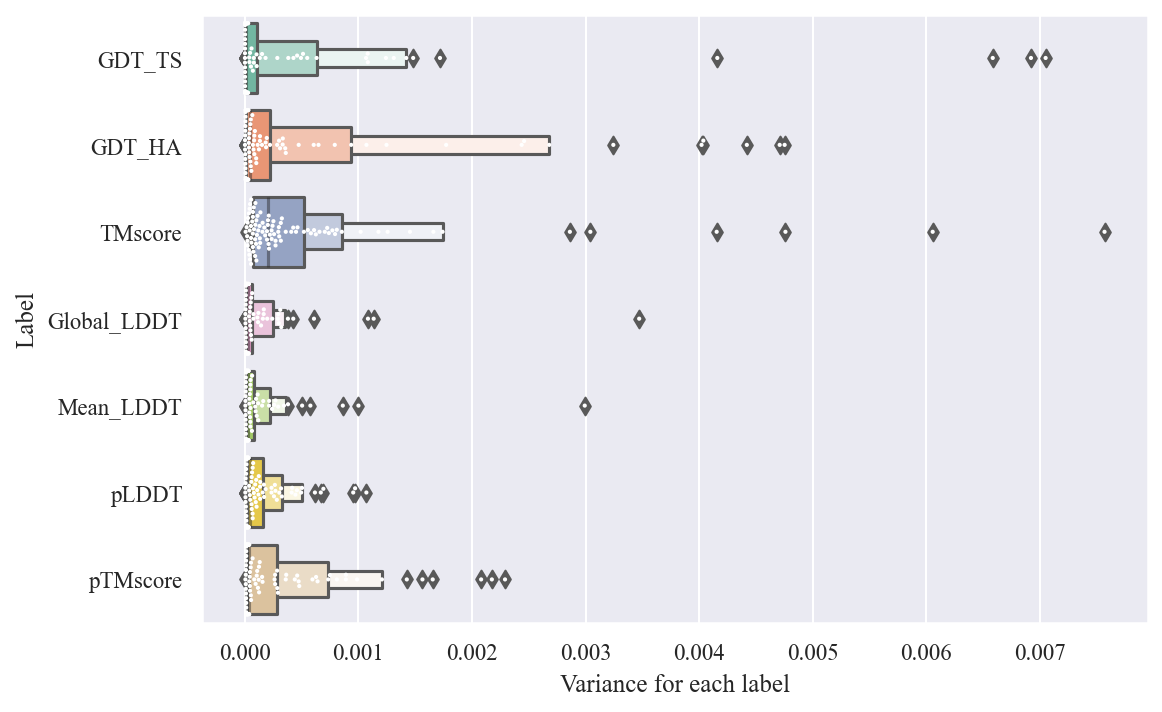

In [14]:
# Variance for each label
label_max_datas = []
for label in labels:
    value=df.groupby('Target').var()[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=2)
plt.xlabel(f'Variance for each label')
plt.tight_layout()
plt.savefig(fig_dir / 'variance_each_labels.png')

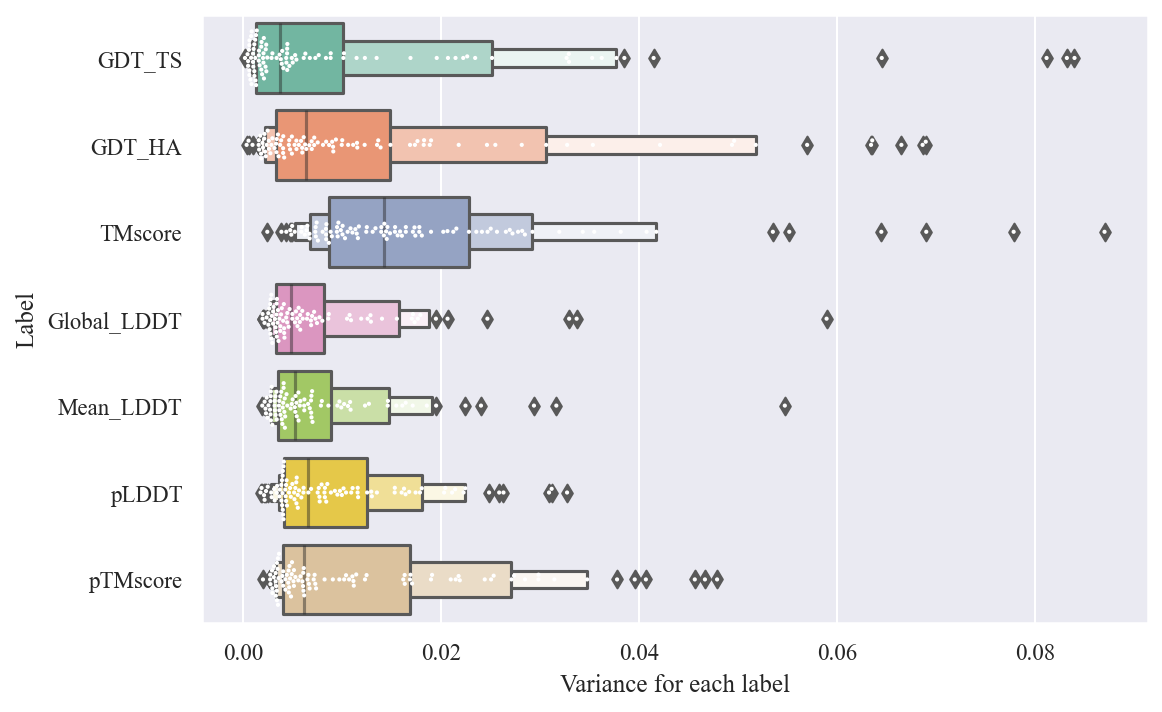

In [15]:
# Standard deviation for each label
label_max_datas = []
for label in labels:
    value=df.groupby('Target').std()[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=2)
plt.xlabel(f'Variance for each label')
plt.tight_layout()
plt.savefig(fig_dir / 'std_each_labels.png')

## Verify model accuracy difference between with and without ensemble

In [16]:
df['Ensemble'] = [True if e == 8 else False for e in df['Ensemble']]
en_df = df.query('Ensemble == True')
no_en_df = df.query('Ensemble == False')
en_merge_df = pd.merge(en_df, no_en_df, on=['ModelName', 'Seed', 'Recycle', 'Target'], suffixes=('_en', '_no_en'))

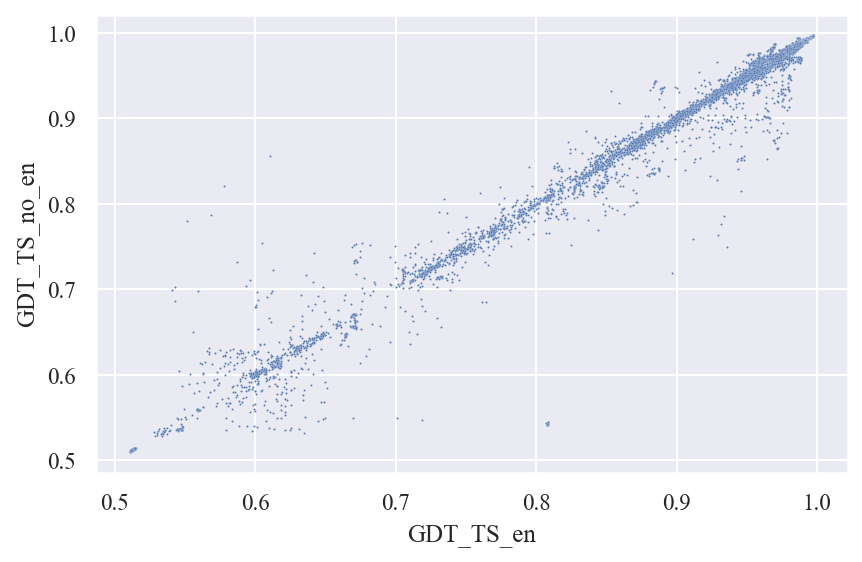

In [17]:
# Scatterplot of GDT_TS of models with and without ensemble
plt.figure(figsize=(6, 4))
label = 'GDT_TS'
# sns.scatterplot(data=en_merge_df, x=f'{label}_en', y=f'{label}_no_en', hue='Target')
sns.scatterplot(data=en_merge_df, x=f'{label}_en', y=f'{label}_no_en', s=1)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{label}_en_or_no_en.png')

## Verify model accuracy difference between different seeds

In [18]:
seed_0_df = df.query('Seed == 0')
seed_1_df = df.query('Seed == 1')
seed_df = pd.merge(seed_0_df, seed_1_df, on=['ModelName', 'Ensemble', 'Recycle', 'Target'], suffixes=('_seed_0', '_seed_1'))

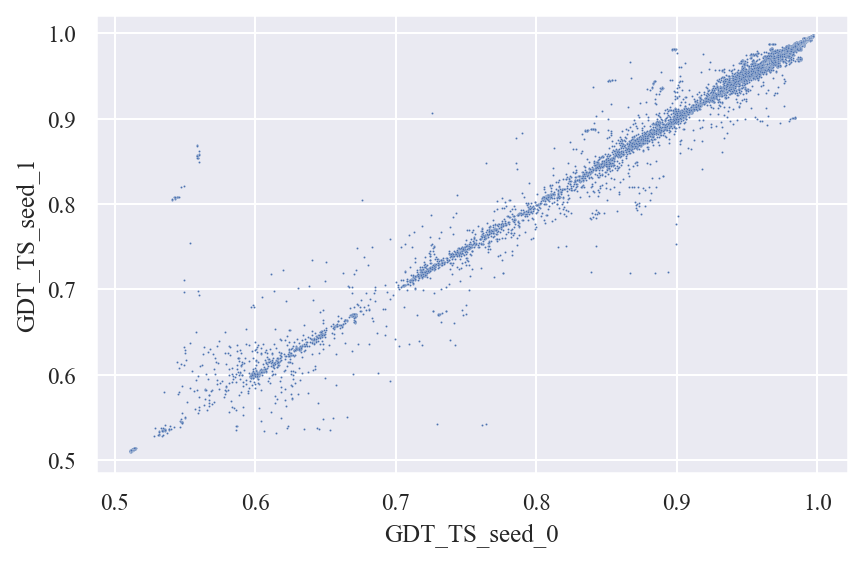

In [19]:
plt.figure(figsize=(6, 4))
label = 'GDT_TS'
sns.scatterplot(data=seed_df, x=f'{label}_seed_0', y=f'{label}_seed_1', s=1)
# sns.scatterplot(data=seed_df, x=f'{label}_seed_0', y=f'{label}_seed_1', hue='Target')
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{label}_seed.png')

## Verify pLDDT and pTM

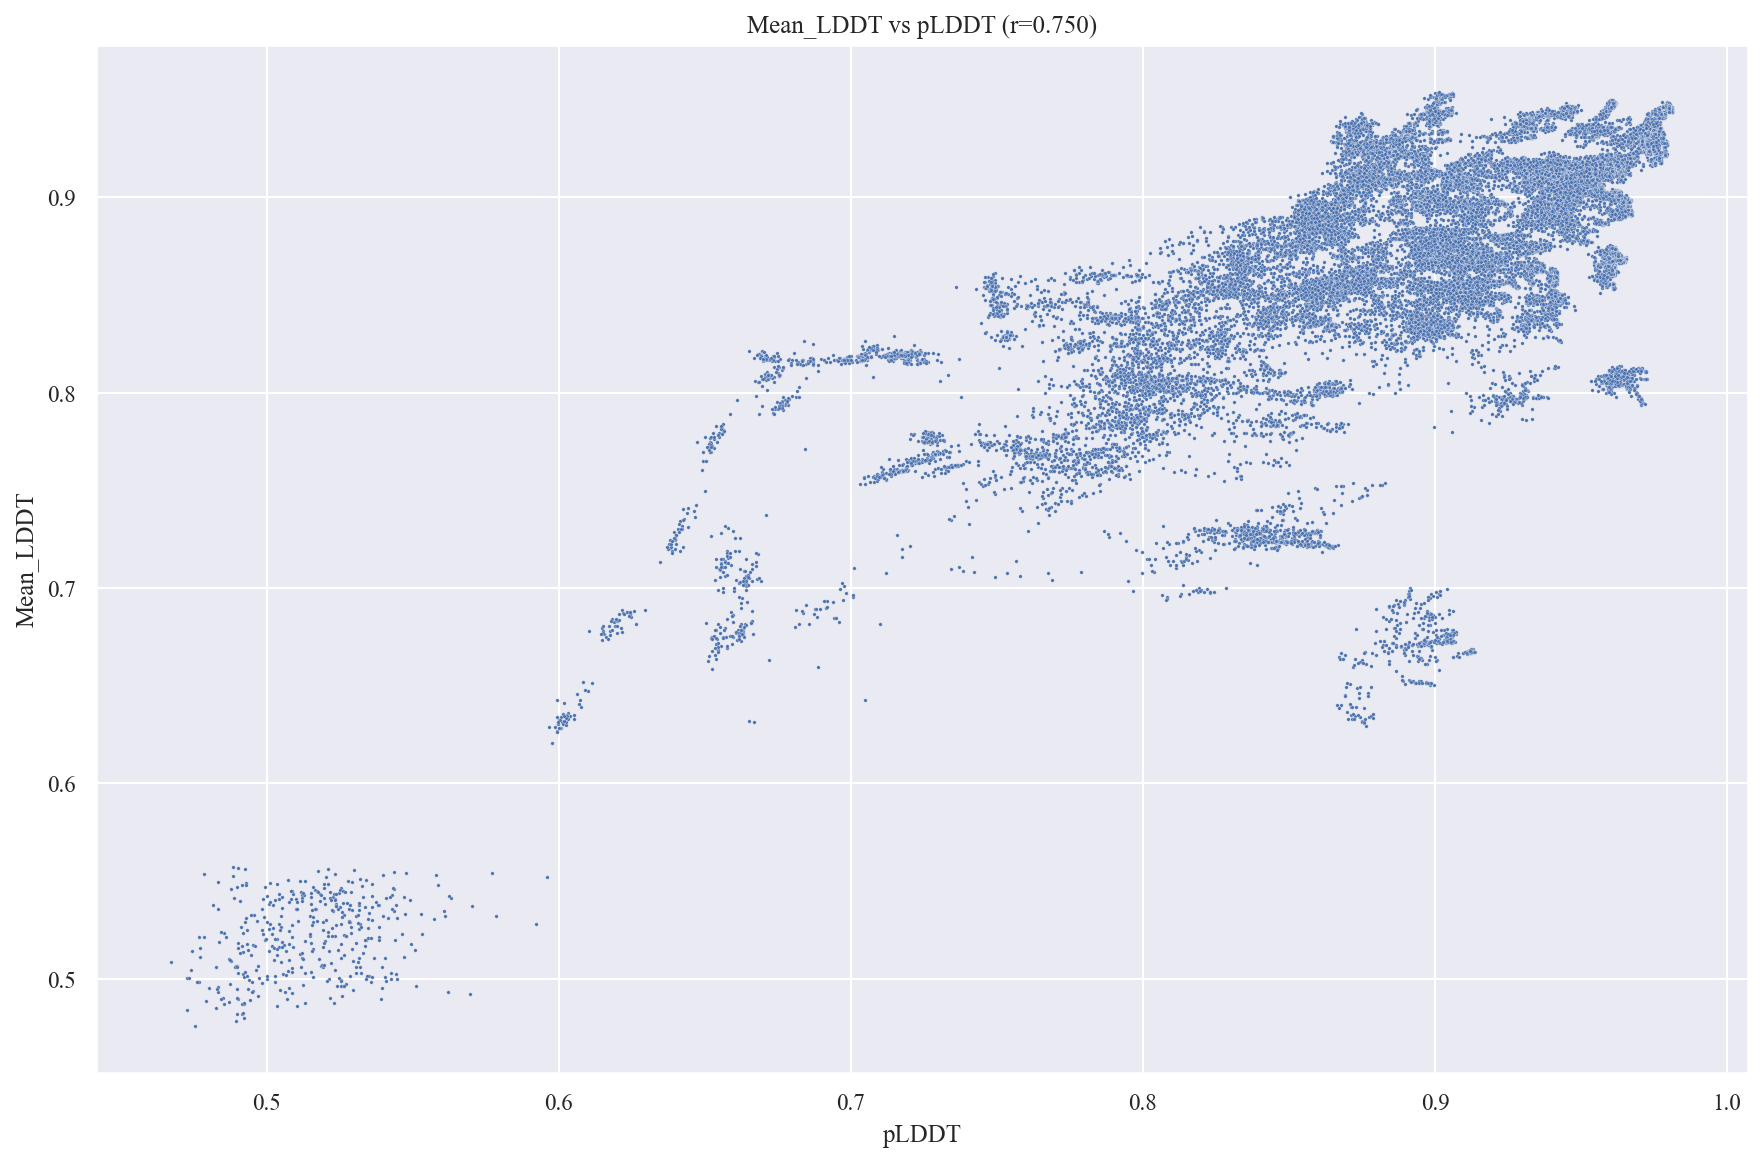

In [20]:
# Mean pLDDT vs Mean LDDT
label = 'Mean_LDDT'
score = 'pLDDT'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.title(f'{label} vs {score} (r={cc:.3f})')
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')


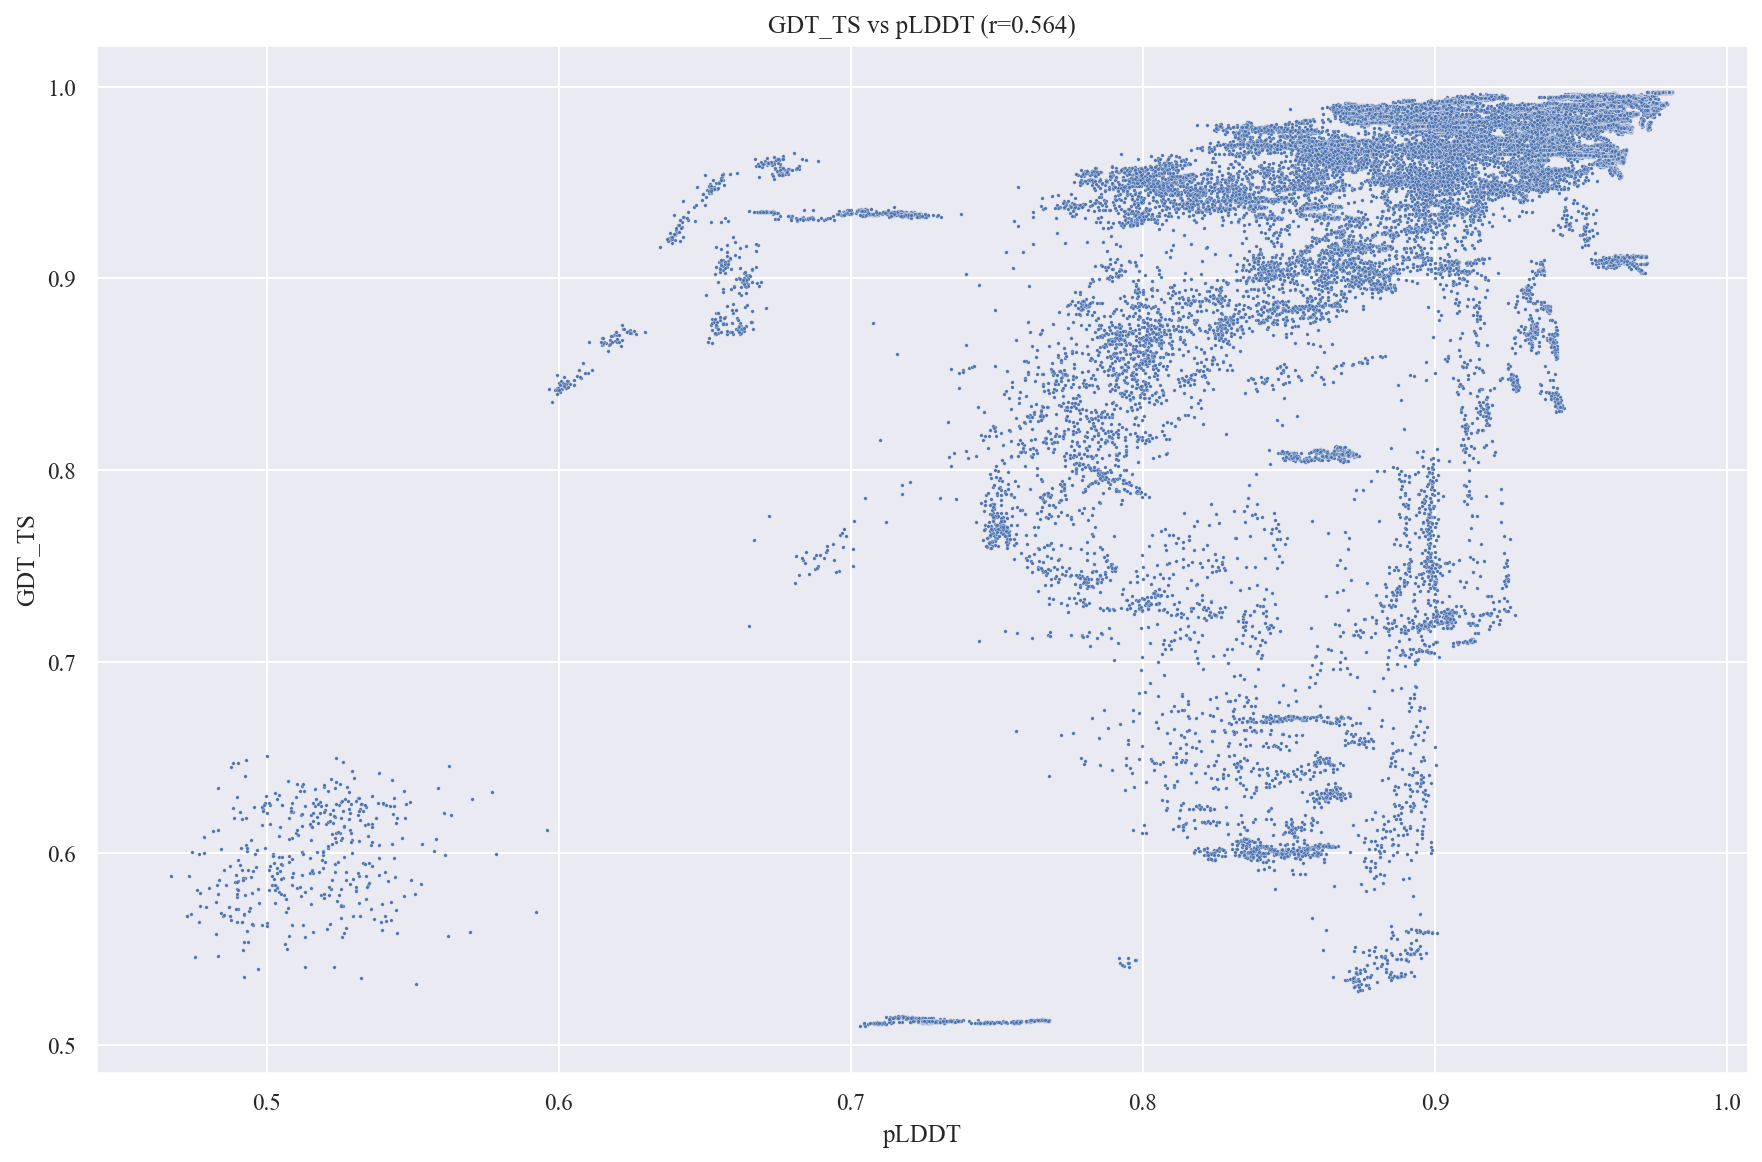

In [21]:
# Mean pLDDT vs GDT_TS
label = 'GDT_TS'
score = 'pLDDT'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.title(f'{label} vs {score} (r={cc:.3f})')
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')


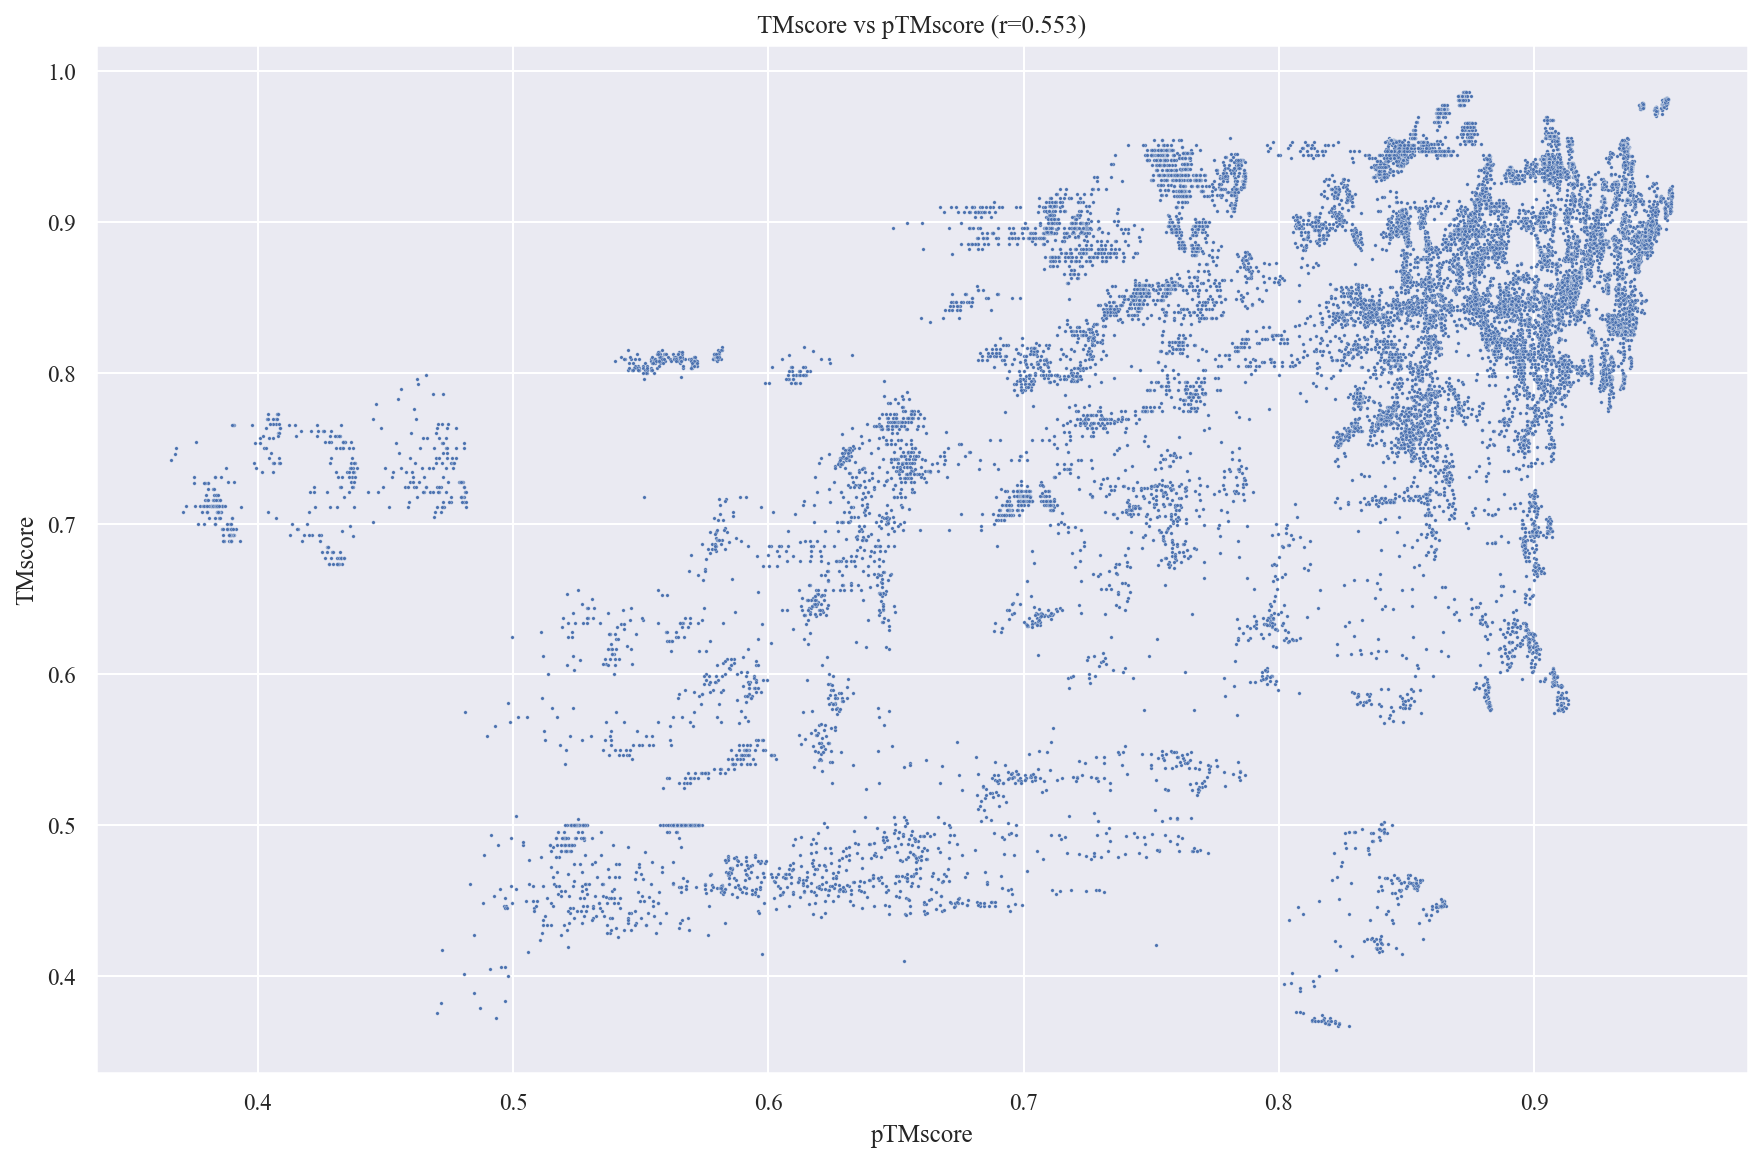

In [22]:
# pTMscore vs TMscore
label = 'TMscore'
score = 'pTMscore'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.title(f'{label} vs {score} (r={cc:.3f})')
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')

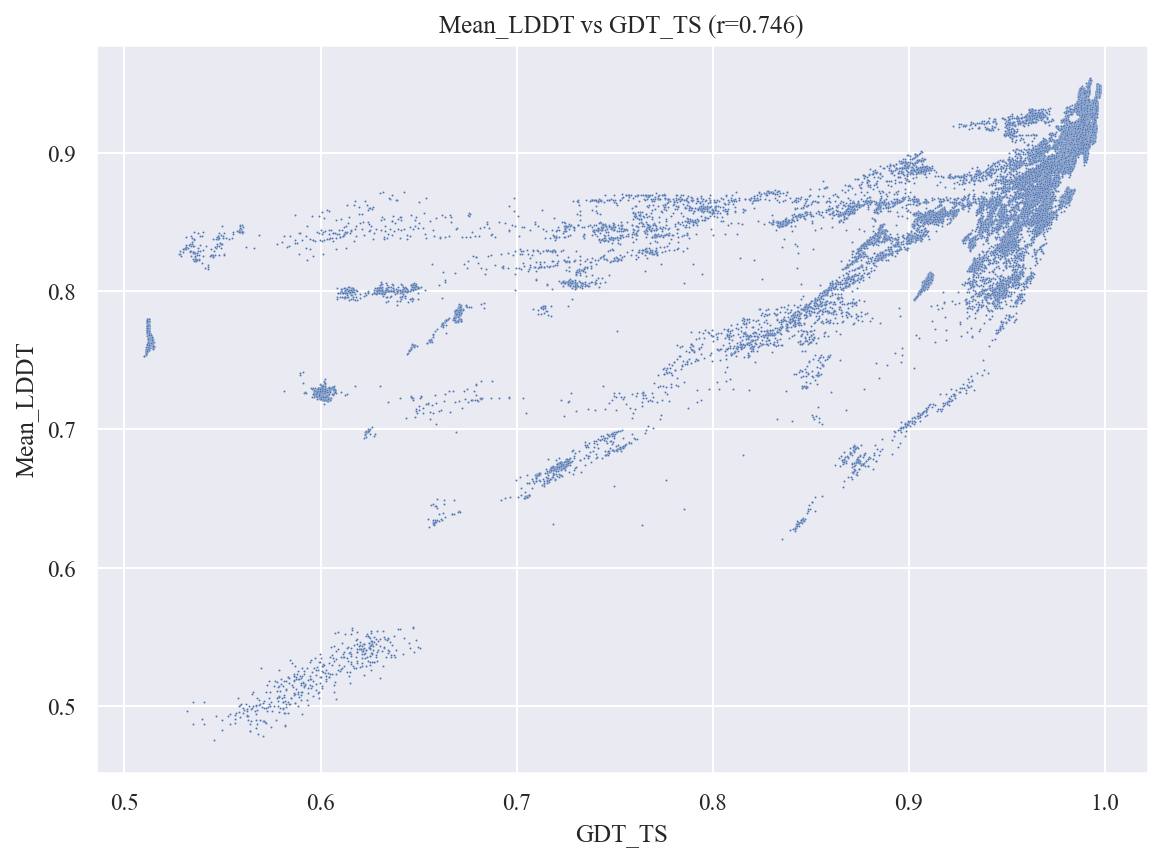

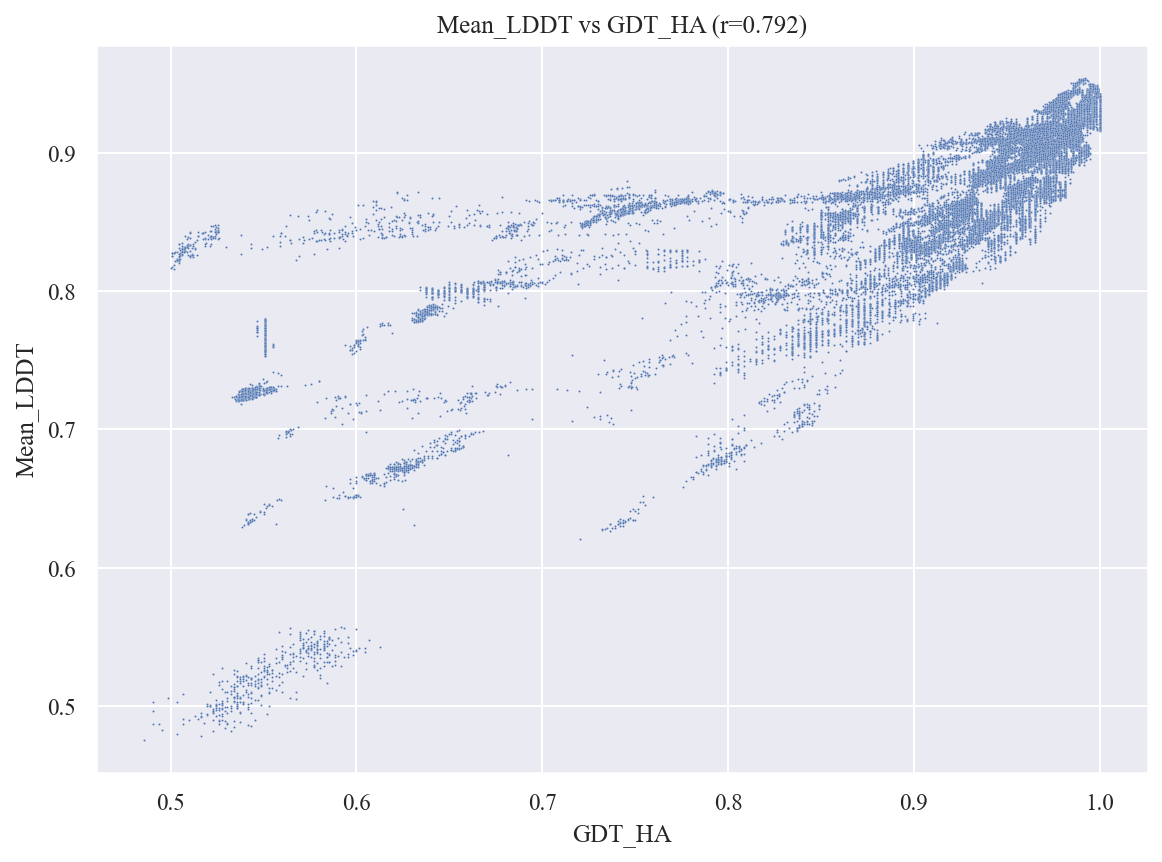

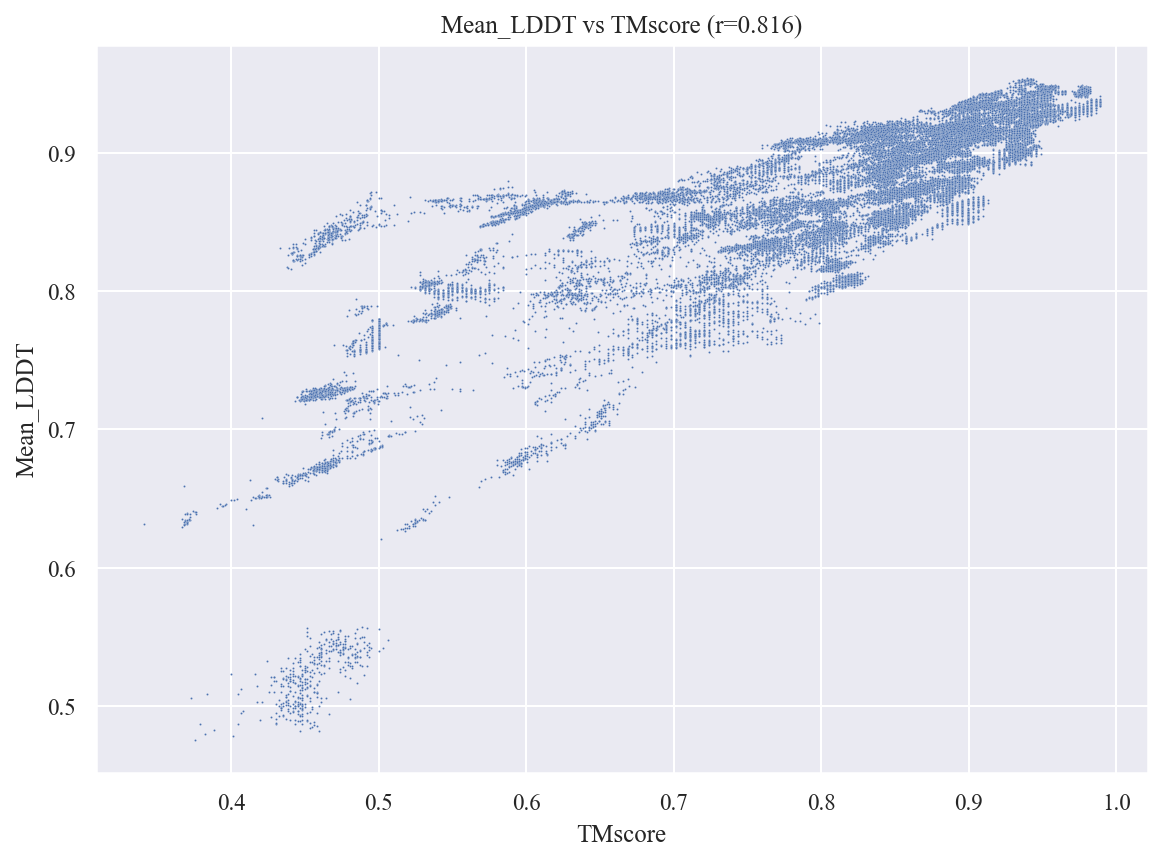

In [23]:
# Global score vs Mean local score
label = 'Mean_LDDT'
for label2 in ['GDT_TS', 'GDT_HA', 'TMscore']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=label2, y=label, s=1)
    cc = df.corr()[label][label2]
    plt.title(f'{label} vs {label2} (r={cc:.3f})')
    plt.tight_layout()
    plt.show()